In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
scores_df = pd.DataFrame({'score':scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J']))
scores_df

,score
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65
J,58


In [4]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [5]:
# 중앙값 증명
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2-1]

median

56.5

In [6]:
# numpy 에서 사분위범위
Q1 = np.percentile(scores,25)
Q3 = np.percentile(scores,75)
IQR = Q3 - Q1
IQR

15.0

In [7]:
# 편찻값
z = 50 + 10 * (scores-np.mean(scores))/np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [8]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277
J,58,53.234983


## 2.4 1차원 데이터의 시각화

In [10]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [11]:
freq,_ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [14]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [16]:
# 계급값 : 각 계급을 대표하는 값
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [17]:
# 상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [18]:
# 누적상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [21]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class_value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [23]:
# 최빈값 : 도수분포표를 사용한 최빈값은 최대가 되는 계급의 계급값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class_value']

65

In [24]:
# 최빈값은 도수분포표를 만드는 방법에 의존한다. 계급폭이 4점이면 최빈값은 66

In [25]:
# 히스토그램
import matplotlib.pyplot as plt
%matplotlib inline

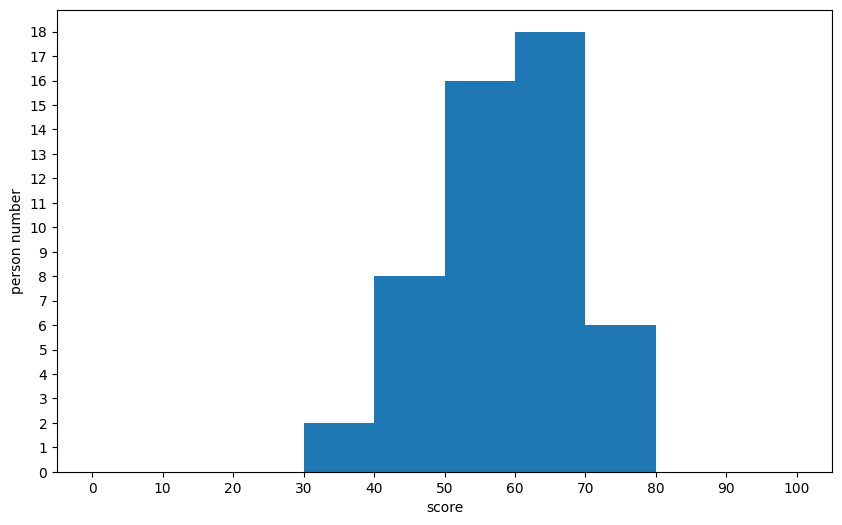

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# 계급수를 10
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

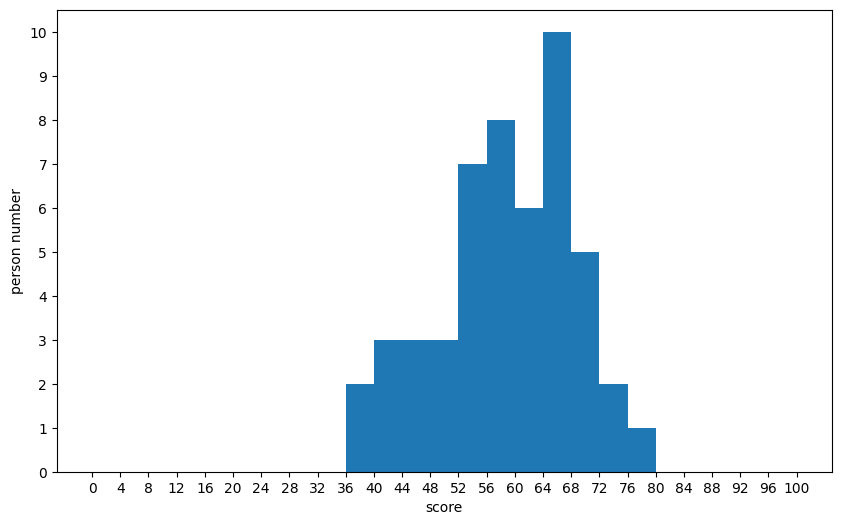

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq,_,_ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100, 25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

In [28]:
# 도수분포표와 히스토그램은 계급수에 따라 모양이 크게 변하기 때문에, 데이터에 따라 적절한 값으로 설정하는 것이 중요

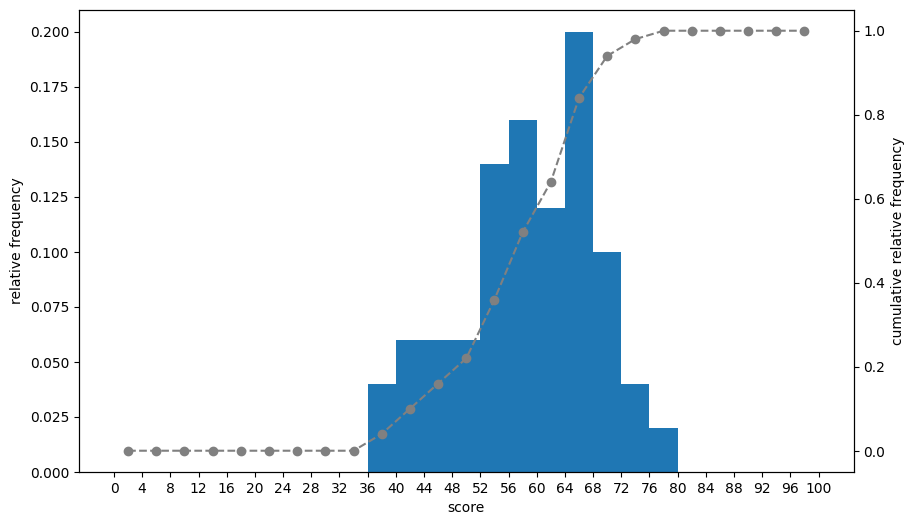

In [29]:
# 상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프와 함께 그린다.
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(english_scores)/len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100, 4)]

# 꺾은선 그래프
ax2.plot(class_value, cum_rel_freq, ls='--',marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100, 25+1))
plt.show()

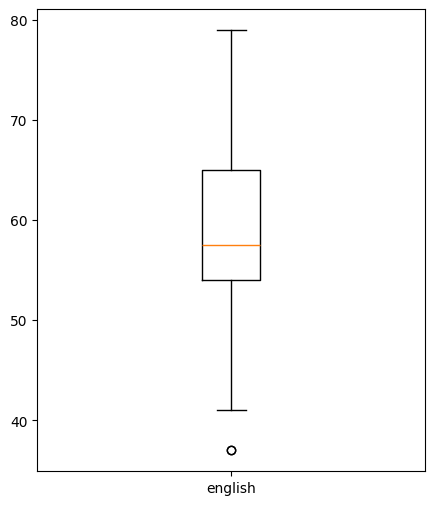

In [30]:
# 상자그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()